In [190]:
from pytrends.request import TrendReq
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [191]:
# Connect to Google Trends
pytrends = TrendReq(hl='en-US', tz=360)
kw_list = ['electric cars']
countries = ['FR','GB-ENG']


In [192]:
df_combined = pd.DataFrame()

for country in countries:
    try:
        # Build the payload for each country
        pytrends.build_payload(kw_list, cat=0, timeframe='today 5-y', geo=country)
        # Fetch interest over time
        df = pytrends.interest_over_time()
        if not df.empty:
            df[country] = df[kw_list[0]]
            df_combined = pd.concat([df_combined, df[country]], axis=1)
    except Exception as e:
        print(f"Error retrieving data for {country}: {e}")


In [125]:
# Ensure the index is datetime
df_combined.index = pd.to_datetime(df_combined.index)

# Extract year from index
df_combined['year'] = df_combined.index.year

# Aggregate data by year
df_yearly = df_combined.groupby('year').mean()


In [131]:
df_yearly

,FR,GB-ENG
year,,
2019,35.032258,33.774194
2020,12.730769,36.230769
2021,22.903846,53.750000
2022,42.884615,55.134615
2023,37.528302,37.811321
2024,36.409091,34.318182


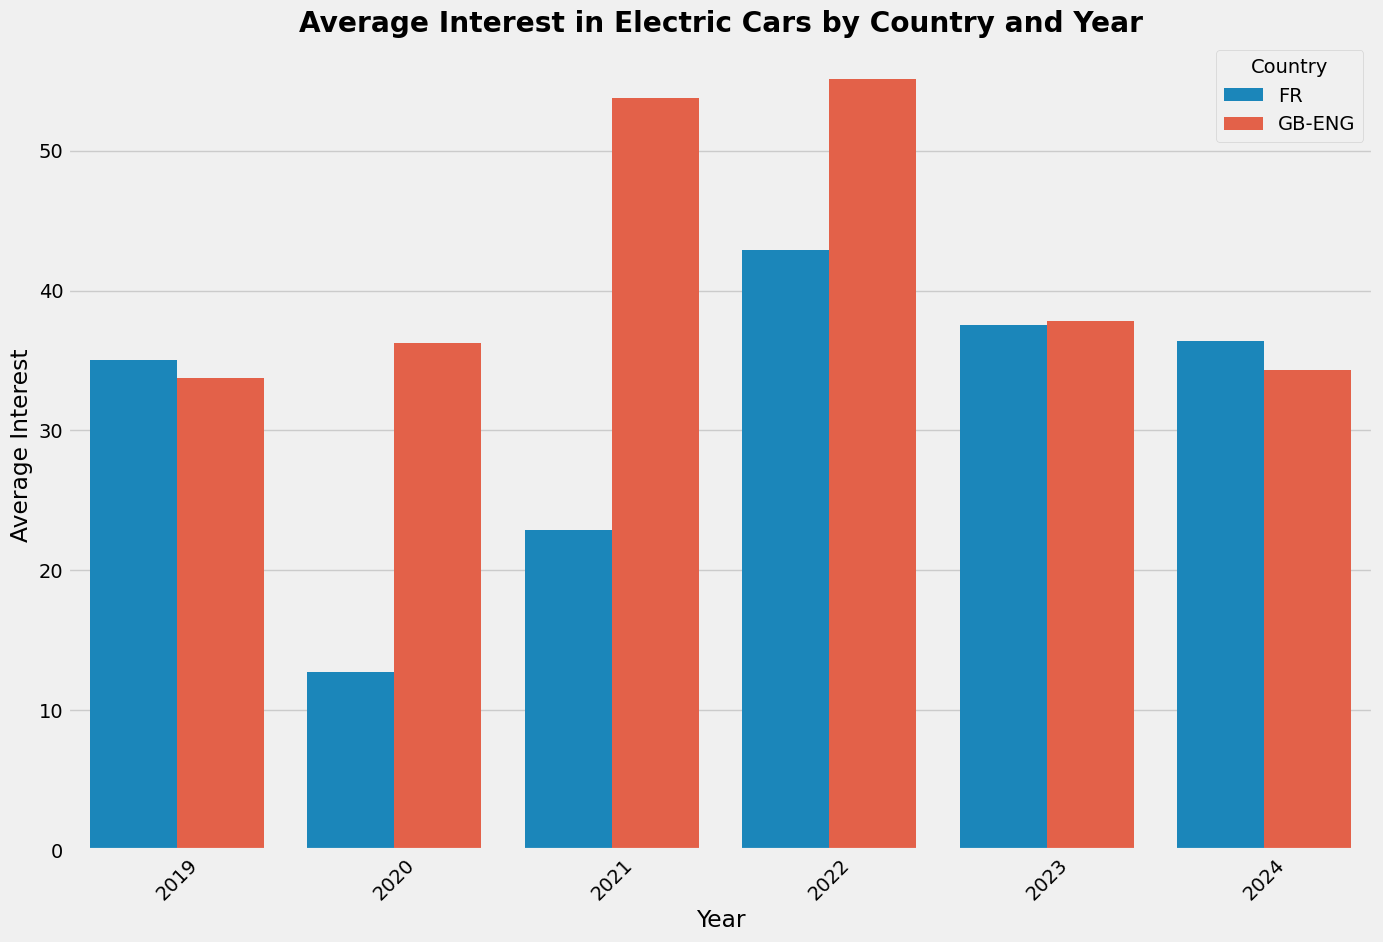

In [134]:
df_yearly1 = df_yearly.reset_index().melt(id_vars='year', var_name='Country', value_name='Average Interest')

if not df_yearly1.empty:
    plt.figure(figsize=(15, 10))
    sns.barplot(x='year', y='Average Interest', hue='Country', data=df_yearly1)
    plt.style.use('fivethirtyeight')
    plt.title('Average Interest in Electric Cars by Country and Year', fontweight='bold')
    plt.xlabel('Year')
    plt.ylabel('Average Interest')
    plt.xticks(rotation=45)
    plt.legend(title='Country')
    plt.show()
else:
    print("No data available to plot.")


In [181]:
related_queries_dict = {}
for country in countries:
    try:
        pytrends.build_payload(kw_list, cat=0, timeframe='today 5-y', geo=country)
        related_queries = pytrends.related_queries()
        related_queries_dict[country] = related_queries[kw_list[0]]['top']
    except Exception as e:
        print(f"Error retrieving related queries for {country}: {e}")


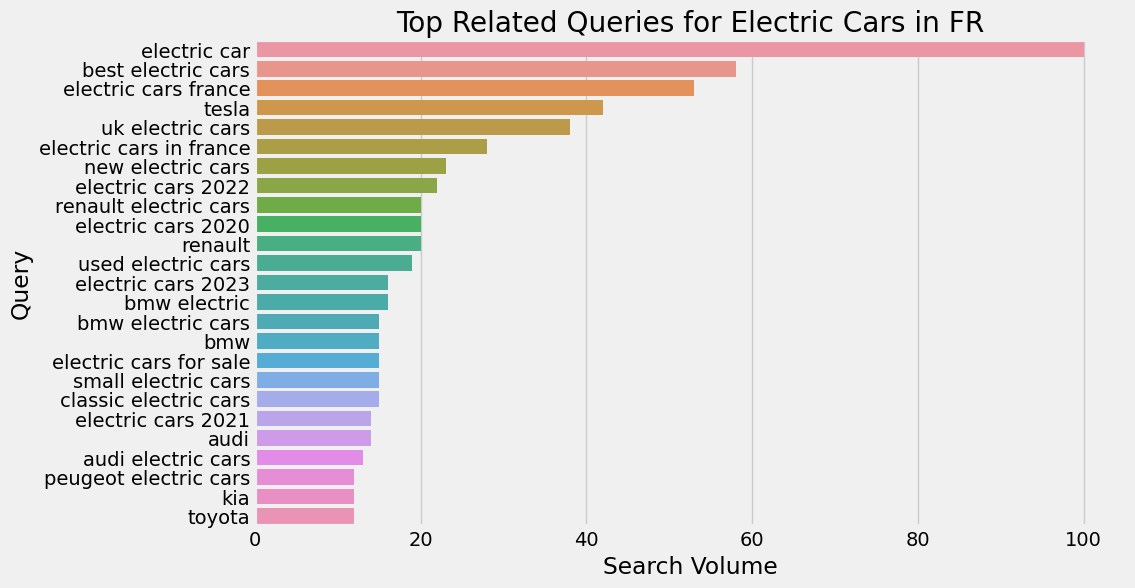

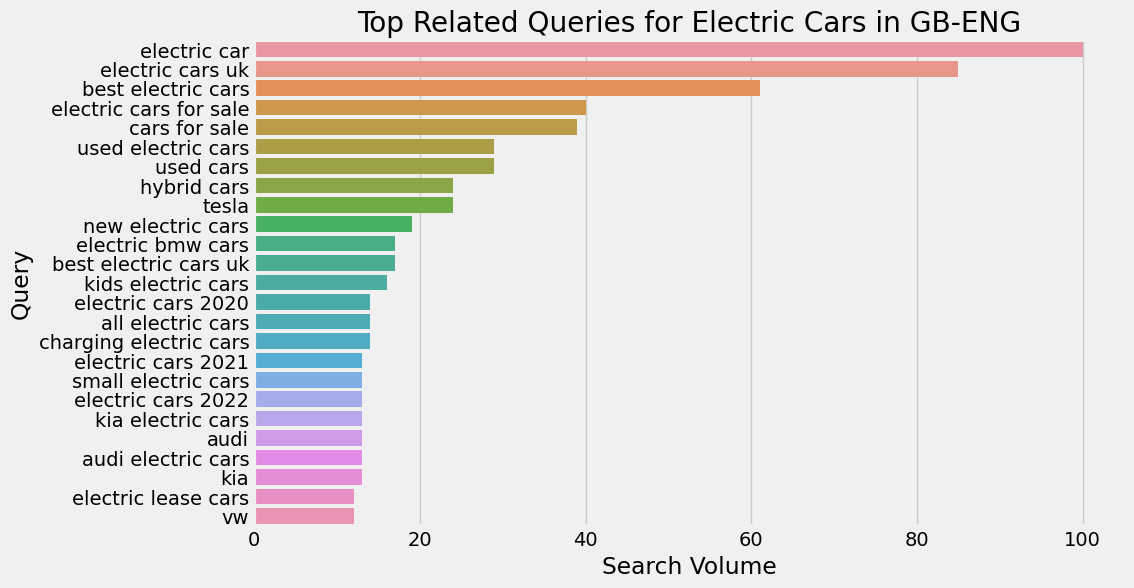

In [183]:
for country, queries_df in related_queries_dict.items():
    # Check if the value is a DataFrame and is not empty
    if isinstance(queries_df, pd.DataFrame) and not queries_df.empty:
        plt.figure(figsize=(10, 6))
        sns.barplot(y=queries_df['query'], x=queries_df['value'])
        plt.title(f'Top Related Queries for Electric Cars in {country}')
        plt.xlabel('Search Volume')
        plt.ylabel('Query')
        plt.show()
    else:
        print(f"No related queries data available to plot for {country}.")

In [147]:
countries1=['france','united_kingdom']
trending_searches_df = pd.DataFrame()
for country in countries1:
    try:
        trending_searches = pytrends.trending_searches(pn=country)
        trending_searches_df[country] = trending_searches[0]
    except Exception as e:
        print(f"Error retrieving trending searches for {country}: {e}")


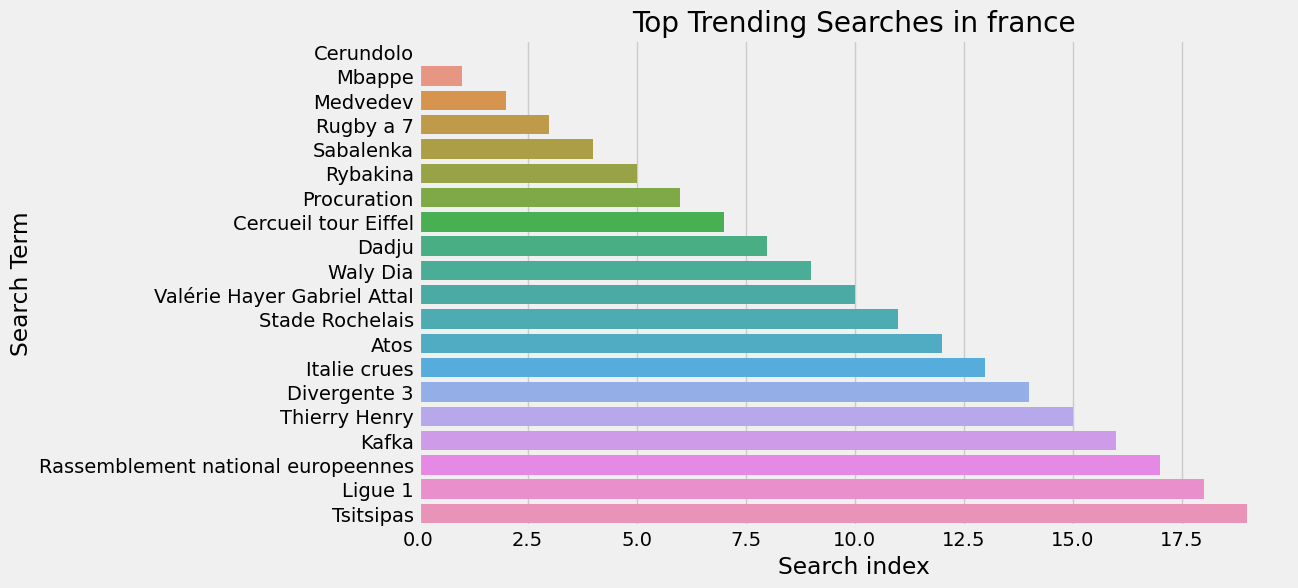

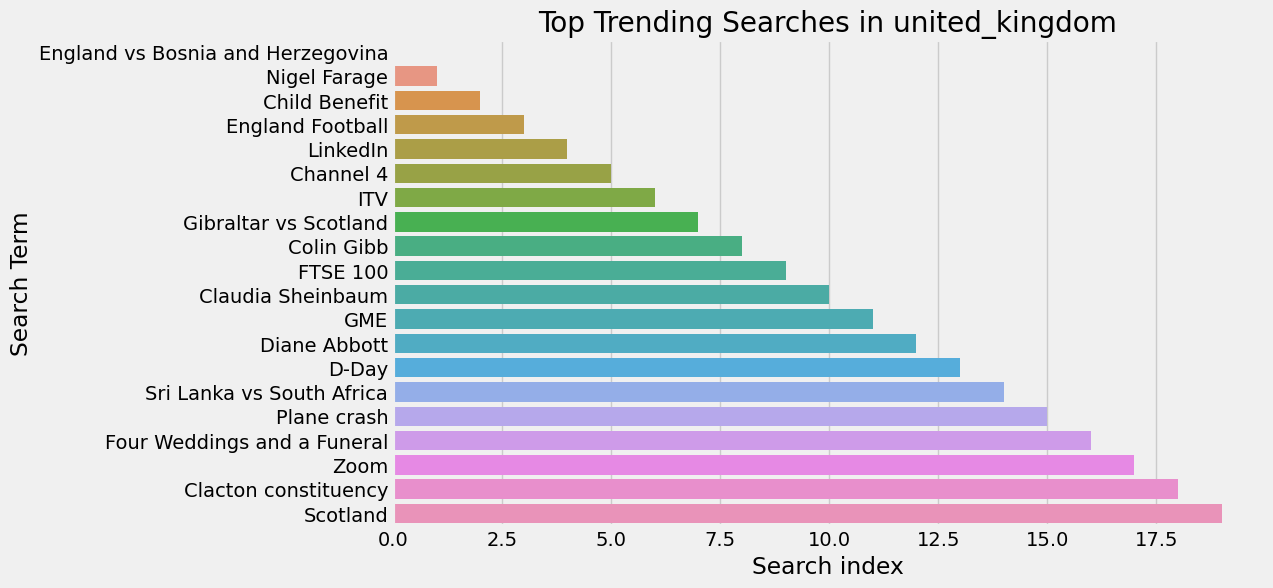

In [154]:
if not trending_searches_df.empty:
    for country in trending_searches_df.columns:
        plt.figure(figsize=(10, 6))
        sns.barplot(x=trending_searches_df.index, y=trending_searches_df[country])
        plt.title(f'Top Trending Searches in {country}')
        plt.xlabel('Search index')
        plt.ylabel('Search Term')
        plt.show()
else:
    print("No trending searches data available to plot.")
